# Train and test the model

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


# Data

In [2]:
# load data
f_path = 'c_data_3A.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'c_testdata_3A.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

/Users/DRRRR/anaconda/envs/machinelearning/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 1

In [4]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# one hot code y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [5]:
# Check model performance accuracy before
model = load_model('classify2B.h5')

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1800/1800 [==============================] - ETA: 1: - ETA: 28s - ETA: 18 - ETA: 12 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 2ms/step


In [7]:
# fit network

epoch = 200
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='val_acc',verbose=1,min_delta=0.5,patience=30,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Train on 12960 samples, validate on 3240 samples
Epoch 1/200
 6720/12960 [==============>...............] - ETA: 12:20 - loss: 1.1921e-07 - acc: 1.00 - ETA: 2:27 - loss: 1.0745 - acc: 0.9333     - ETA: 1:20 - loss: 0.7439 - acc: 0.953 - ETA: 1:00 - loss: 0.6447 - acc: 0.960 - ETA: 50s - loss: 0.7166 - acc: 0.955 - ETA: 44s - loss: 0.9483 - acc: 0.94 - ETA: 40s - loss: 0.8226 - acc: 0.94 - ETA: 38s - loss: 0.7029 - acc: 0.95 - ETA: 36s - loss: 0.8747 - acc: 0.94 - ETA: 34s - loss: 0.7760 - acc: 0.94 - ETA: 32s - loss: 0.7311 - acc: 0.94 - ETA: 31s - loss: 0.8091 - acc: 0.94 - ETA: 30s - loss: 0.8631 - acc: 0.93 - ETA: 30s - loss: 0.9392 - acc: 0.93 - ETA: 29s - loss: 0.9144 - acc: 0.93 - ETA: 28s - loss: 0.8841 - acc: 0.93 - ETA: 28s - loss: 0.8347 - acc: 0.93 - ETA: 27s - loss: 0.8417 - acc: 0.93 - ETA: 27s - loss: 0.8270 - acc: 0.93 - ETA: 27s - loss: 0.7825 - acc: 0.94 - ETA: 26s - loss: 0.7373 - acc: 0.94 - ETA: 26s - loss: 0.7205 - acc: 0.94 - ETA: 26s - loss: 0.6879 - acc: 0.94 - 

 6735/12960 [==============>...............] - ETA: 58s - loss: 1.1921e-07 - acc: 1.00 - ETA: 26s - loss: 0.0263 - acc: 1.0000   - ETA: 24s - loss: 0.0282 - acc: 1.00 - ETA: 24s - loss: 0.0210 - acc: 1.00 - ETA: 24s - loss: 0.0160 - acc: 1.00 - ETA: 24s - loss: 0.0129 - acc: 1.00 - ETA: 23s - loss: 0.0108 - acc: 1.00 - ETA: 23s - loss: 0.0094 - acc: 1.00 - ETA: 22s - loss: 0.0105 - acc: 1.00 - ETA: 22s - loss: 0.0113 - acc: 1.00 - ETA: 22s - loss: 0.0112 - acc: 1.00 - ETA: 22s - loss: 0.0101 - acc: 1.00 - ETA: 22s - loss: 0.0096 - acc: 1.00 - ETA: 22s - loss: 0.0089 - acc: 1.00 - ETA: 22s - loss: 0.0082 - acc: 1.00 - ETA: 22s - loss: 0.0085 - acc: 1.00 - ETA: 22s - loss: 0.0094 - acc: 0.99 - ETA: 21s - loss: 0.0092 - acc: 0.99 - ETA: 21s - loss: 0.0098 - acc: 0.99 - ETA: 21s - loss: 0.0093 - acc: 0.99 - ETA: 21s - loss: 0.0335 - acc: 0.99 - ETA: 21s - loss: 0.0323 - acc: 0.99 - ETA: 21s - loss: 0.0314 - acc: 0.99 - ETA: 21s - loss: 0.0301 - acc: 0.99 - ETA: 21s - loss: 0.0291 - acc: 0.

12960/12960 [==============================] - ETA: 10s - loss: 0.0283 - acc: 0.99 - ETA: 10s - loss: 0.0282 - acc: 0.99 - ETA: 10s - loss: 0.0281 - acc: 0.99 - ETA: 10s - loss: 0.0280 - acc: 0.99 - ETA: 10s - loss: 0.0280 - acc: 0.99 - ETA: 10s - loss: 0.0281 - acc: 0.99 - ETA: 10s - loss: 0.0280 - acc: 0.99 - ETA: 10s - loss: 0.0280 - acc: 0.99 - ETA: 10s - loss: 0.0279 - acc: 0.99 - ETA: 10s - loss: 0.0278 - acc: 0.99 - ETA: 10s - loss: 0.0277 - acc: 0.99 - ETA: 10s - loss: 0.0276 - acc: 0.99 - ETA: 10s - loss: 0.0275 - acc: 0.99 - ETA: 10s - loss: 0.0274 - acc: 0.99 - ETA: 10s - loss: 0.0273 - acc: 0.99 - ETA: 10s - loss: 0.0272 - acc: 0.99 - ETA: 10s - loss: 0.0270 - acc: 0.99 - ETA: 10s - loss: 0.0270 - acc: 0.99 - ETA: 9s - loss: 0.0270 - acc: 0.9964 - ETA: 9s - loss: 0.0269 - acc: 0.996 - ETA: 9s - loss: 0.0268 - acc: 0.996 - ETA: 9s - loss: 0.0267 - acc: 0.996 - ETA: 9s - loss: 0.0267 - acc: 0.996 - ETA: 9s - loss: 0.0288 - acc: 0.996 - ETA: 9s - loss: 0.0287 - acc: 0.996 - ET

 6760/12960 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 0.0023 - acc: 1.0000   - ETA: 23s - loss: 0.0038 - acc: 1.00 - ETA: 23s - loss: 0.0825 - acc: 0.98 - ETA: 23s - loss: 0.0654 - acc: 0.99 - ETA: 23s - loss: 0.0531 - acc: 0.99 - ETA: 22s - loss: 0.0445 - acc: 0.99 - ETA: 23s - loss: 0.0384 - acc: 0.99 - ETA: 22s - loss: 0.0340 - acc: 0.99 - ETA: 22s - loss: 0.0306 - acc: 0.99 - ETA: 22s - loss: 0.0582 - acc: 0.99 - ETA: 22s - loss: 0.0533 - acc: 0.99 - ETA: 22s - loss: 0.0489 - acc: 0.99 - ETA: 22s - loss: 0.0472 - acc: 0.99 - ETA: 22s - loss: 0.0454 - acc: 0.99 - ETA: 22s - loss: 0.0429 - acc: 0.99 - ETA: 22s - loss: 0.0409 - acc: 0.99 - ETA: 22s - loss: 0.0386 - acc: 0.99 - ETA: 22s - loss: 0.0365 - acc: 0.99 - ETA: 22s - loss: 0.0347 - acc: 0.99 - ETA: 22s - loss: 0.0330 - acc: 0.99 - ETA: 21s - loss: 0.0320 - acc: 0.99 - ETA: 21s - loss: 0.0310 - acc: 0.99 - ETA: 21s - loss: 0.0348 - acc: 0.99 - ETA: 21s - loss: 0.0334 - acc: 0.

12960/12960 [==============================] - ETA: 10s - loss: 0.0495 - acc: 0.99 - ETA: 10s - loss: 0.0493 - acc: 0.99 - ETA: 10s - loss: 0.0491 - acc: 0.99 - ETA: 10s - loss: 0.0489 - acc: 0.99 - ETA: 10s - loss: 0.0487 - acc: 0.99 - ETA: 10s - loss: 0.0486 - acc: 0.99 - ETA: 10s - loss: 0.0484 - acc: 0.99 - ETA: 10s - loss: 0.0482 - acc: 0.99 - ETA: 10s - loss: 0.0480 - acc: 0.99 - ETA: 10s - loss: 0.0478 - acc: 0.99 - ETA: 10s - loss: 0.0476 - acc: 0.99 - ETA: 10s - loss: 0.0474 - acc: 0.99 - ETA: 10s - loss: 0.0472 - acc: 0.99 - ETA: 10s - loss: 0.0471 - acc: 0.99 - ETA: 10s - loss: 0.0469 - acc: 0.99 - ETA: 10s - loss: 0.0467 - acc: 0.99 - ETA: 10s - loss: 0.0466 - acc: 0.99 - ETA: 9s - loss: 0.0464 - acc: 0.9953 - ETA: 9s - loss: 0.0462 - acc: 0.995 - ETA: 9s - loss: 0.0461 - acc: 0.995 - ETA: 9s - loss: 0.0459 - acc: 0.995 - ETA: 9s - loss: 0.0457 - acc: 0.995 - ETA: 9s - loss: 0.0455 - acc: 0.995 - ETA: 9s - loss: 0.0454 - acc: 0.995 - ETA: 9s - loss: 0.0452 - acc: 0.995 - ET

Epoch 6/200


 6420/12960 [=============>................] - ETA: 20s - loss: 0.0011 - acc: 1.00 - ETA: 22s - loss: 0.0137 - acc: 1.00 - ETA: 23s - loss: 0.0081 - acc: 1.00 - ETA: 22s - loss: 0.0553 - acc: 0.98 - ETA: 22s - loss: 0.0421 - acc: 0.99 - ETA: 23s - loss: 0.0339 - acc: 0.99 - ETA: 22s - loss: 0.0478 - acc: 0.98 - ETA: 22s - loss: 0.0415 - acc: 0.99 - ETA: 22s - loss: 0.0368 - acc: 0.99 - ETA: 22s - loss: 0.0330 - acc: 0.99 - ETA: 22s - loss: 0.0298 - acc: 0.99 - ETA: 22s - loss: 0.0393 - acc: 0.99 - ETA: 22s - loss: 0.0361 - acc: 0.99 - ETA: 22s - loss: 0.0336 - acc: 0.99 - ETA: 22s - loss: 0.0317 - acc: 0.99 - ETA: 22s - loss: 0.0296 - acc: 0.99 - ETA: 22s - loss: 0.0281 - acc: 0.99 - ETA: 22s - loss: 0.0267 - acc: 0.99 - ETA: 22s - loss: 0.0254 - acc: 0.99 - ETA: 22s - loss: 0.0244 - acc: 0.99 - ETA: 21s - loss: 0.0366 - acc: 0.99 - ETA: 21s - loss: 0.0352 - acc: 0.99 - ETA: 21s - loss: 0.0356 - acc: 0.99 - ETA: 21s - loss: 0.0343 - acc: 0.99 - ETA: 21s - loss: 0.0379 - acc: 0.99 - ETA

 6470/12960 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 5.0781e-04 - acc: 1.00 - ETA: 23s - loss: 0.0047 - acc: 1.0000   - ETA: 23s - loss: 0.0037 - acc: 1.00 - ETA: 23s - loss: 0.0035 - acc: 1.00 - ETA: 22s - loss: 0.0034 - acc: 1.00 - ETA: 22s - loss: 0.0029 - acc: 1.00 - ETA: 22s - loss: 0.0026 - acc: 1.00 - ETA: 22s - loss: 0.0029 - acc: 1.00 - ETA: 22s - loss: 0.0036 - acc: 1.00 - ETA: 22s - loss: 0.0035 - acc: 1.00 - ETA: 22s - loss: 0.0034 - acc: 1.00 - ETA: 22s - loss: 0.0032 - acc: 1.00 - ETA: 22s - loss: 0.0035 - acc: 1.00 - ETA: 22s - loss: 0.0033 - acc: 1.00 - ETA: 22s - loss: 0.0031 - acc: 1.00 - ETA: 22s - loss: 0.0034 - acc: 1.00 - ETA: 22s - loss: 0.0032 - acc: 1.00 - ETA: 22s - loss: 0.0032 - acc: 1.00 - ETA: 22s - loss: 0.0031 - acc: 1.00 - ETA: 22s - loss: 0.0038 - acc: 1.00 - ETA: 21s - loss: 0.0037 - acc: 1.00 - ETA: 21s - loss: 0.0035 - acc: 1.00 - ETA: 21s - loss: 0.0036 -

12960/12960 [==============================] - ETA: 0s - loss: 0.0089 - acc: 0.998 - 27s 2ms/step - loss: 0.0089 - acc: 0.9985 - val_loss: 0.0278 - val_acc: 0.9975
Epoch 8/200
 6825/12960 [==============>...............] - ETA: 20s - loss: 1.0371e-05 - acc: 1.00 - ETA: 23s - loss: 0.0096 - acc: 1.0000   - ETA: 23s - loss: 0.0053 - acc: 1.00 - ETA: 22s - loss: 0.0042 - acc: 1.00 - ETA: 22s - loss: 0.0033 - acc: 1.00 - ETA: 22s - loss: 0.0036 - acc: 1.00 - ETA: 22s - loss: 0.0031 - acc: 1.00 - ETA: 22s - loss: 0.0027 - acc: 1.00 - ETA: 22s - loss: 0.0024 - acc: 1.00 - ETA: 22s - loss: 0.0025 - acc: 1.00 - ETA: 22s - loss: 0.0023 - acc: 1.00 - ETA: 22s - loss: 0.0021 - acc: 1.00 - ETA: 22s - loss: 0.0023 - acc: 1.00 - ETA: 22s - loss: 0.0021 - acc: 1.00 - ETA: 22s - loss: 0.0020 - acc: 1.00 - ETA: 22s - loss: 0.0029 - acc: 1.00 - ETA: 21s - loss: 0.0027 - acc: 1.00 - ETA: 21s - loss: 0.0027 - acc: 1.00 - ETA: 21s - loss: 0.0025 - acc: 1.00 - ETA: 21s - loss: 0.0024 - acc: 1.00 - ETA: 21s 

 6575/12960 [==============>...............] - ETA: 25s - loss: 2.4557e-06 - acc: 1.00 - ETA: 21s - loss: 6.9066e-04 - acc: 1.00 - ETA: 22s - loss: 5.7039e-04 - acc: 1.00 - ETA: 22s - loss: 4.9135e-04 - acc: 1.00 - ETA: 22s - loss: 4.2513e-04 - acc: 1.00 - ETA: 22s - loss: 4.3691e-04 - acc: 1.00 - ETA: 22s - loss: 3.7813e-04 - acc: 1.00 - ETA: 22s - loss: 3.6145e-04 - acc: 1.00 - ETA: 22s - loss: 3.1809e-04 - acc: 1.00 - ETA: 22s - loss: 2.8462e-04 - acc: 1.00 - ETA: 22s - loss: 2.9364e-04 - acc: 1.00 - ETA: 22s - loss: 2.8140e-04 - acc: 1.00 - ETA: 22s - loss: 2.6222e-04 - acc: 1.00 - ETA: 22s - loss: 4.5803e-04 - acc: 1.00 - ETA: 22s - loss: 4.6278e-04 - acc: 1.00 - ETA: 22s - loss: 4.3623e-04 - acc: 1.00 - ETA: 22s - loss: 4.2106e-04 - acc: 1.00 - ETA: 22s - loss: 3.9301e-04 - acc: 1.00 - ETA: 22s - loss: 3.7401e-04 - acc: 1.00 - ETA: 21s - loss: 3.5202e-04 - acc: 1.00 - ETA: 21s - loss: 3.3294e-04 - acc: 1.00 - ETA: 21s - loss: 3.2123e-04 - acc: 1.00 - ETA: 21s - loss: 3.0324e-04 -

12960/12960 [==============================] - ETA: 11s - loss: 0.0147 - acc: 0.99 - ETA: 11s - loss: 0.0146 - acc: 0.99 - ETA: 11s - loss: 0.0146 - acc: 0.99 - ETA: 11s - loss: 0.0145 - acc: 0.99 - ETA: 11s - loss: 0.0144 - acc: 0.99 - ETA: 11s - loss: 0.0160 - acc: 0.99 - ETA: 10s - loss: 0.0177 - acc: 0.99 - ETA: 10s - loss: 0.0176 - acc: 0.99 - ETA: 10s - loss: 0.0175 - acc: 0.99 - ETA: 10s - loss: 0.0175 - acc: 0.99 - ETA: 10s - loss: 0.0174 - acc: 0.99 - ETA: 10s - loss: 0.0173 - acc: 0.99 - ETA: 10s - loss: 0.0194 - acc: 0.99 - ETA: 10s - loss: 0.0193 - acc: 0.99 - ETA: 10s - loss: 0.0192 - acc: 0.99 - ETA: 10s - loss: 0.0215 - acc: 0.99 - ETA: 10s - loss: 0.0259 - acc: 0.99 - ETA: 10s - loss: 0.0281 - acc: 0.99 - ETA: 10s - loss: 0.0280 - acc: 0.99 - ETA: 10s - loss: 0.0308 - acc: 0.99 - ETA: 10s - loss: 0.0307 - acc: 0.99 - ETA: 10s - loss: 0.0306 - acc: 0.99 - ETA: 10s - loss: 0.0305 - acc: 0.99 - ETA: 10s - loss: 0.0303 - acc: 0.99 - ETA: 10s - loss: 0.0302 - acc: 0.99 - ETA

 6480/12960 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 0.0021 - acc: 1.0000   - ETA: 23s - loss: 0.0015 - acc: 1.00 - ETA: 23s - loss: 0.0011 - acc: 1.00 - ETA: 22s - loss: 8.4506e-04 - acc: 1.00 - ETA: 22s - loss: 6.8495e-04 - acc: 1.00 - ETA: 22s - loss: 5.8321e-04 - acc: 1.00 - ETA: 22s - loss: 5.3497e-04 - acc: 1.00 - ETA: 22s - loss: 4.7629e-04 - acc: 1.00 - ETA: 22s - loss: 4.4132e-04 - acc: 1.00 - ETA: 22s - loss: 4.5385e-04 - acc: 1.00 - ETA: 22s - loss: 4.2919e-04 - acc: 1.00 - ETA: 22s - loss: 3.9709e-04 - acc: 1.00 - ETA: 22s - loss: 4.0888e-04 - acc: 1.00 - ETA: 22s - loss: 4.1022e-04 - acc: 1.00 - ETA: 22s - loss: 3.8536e-04 - acc: 1.00 - ETA: 22s - loss: 3.6219e-04 - acc: 1.00 - ETA: 22s - loss: 3.4628e-04 - acc: 1.00 - ETA: 22s - loss: 3.2722e-04 - acc: 1.00 - ETA: 22s - loss: 3.4481e-04 - acc: 1.00 - ETA: 21s - loss: 3.2954e-04 - acc: 1.00 - ETA: 21s - loss: 3.1587e-04 - acc: 1.00 - ETA: 21s - loss: 3.0244e-04 - acc: 1.

12920/12960 [============================>.] - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA

12960/12960 [==============================] - ETA: 0s - loss: 0.0151 - acc: 0.998 - 27s 2ms/step - loss: 0.0151 - acc: 0.9985 - val_loss: 0.0605 - val_acc: 0.9948
Epoch 11/200
 6605/12960 [==============>...............] - ETA: 20s - loss: 0.0057 - acc: 1.00 - ETA: 23s - loss: 0.4131 - acc: 0.97 - ETA: 23s - loss: 0.2224 - acc: 0.98 - ETA: 23s - loss: 0.6612 - acc: 0.95 - ETA: 23s - loss: 0.5025 - acc: 0.96 - ETA: 23s - loss: 0.6132 - acc: 0.96 - ETA: 22s - loss: 0.5138 - acc: 0.96 - ETA: 22s - loss: 0.4535 - acc: 0.96 - ETA: 22s - loss: 0.3980 - acc: 0.97 - ETA: 22s - loss: 0.4132 - acc: 0.97 - ETA: 22s - loss: 0.3737 - acc: 0.97 - ETA: 22s - loss: 0.3403 - acc: 0.97 - ETA: 22s - loss: 0.3147 - acc: 0.97 - ETA: 22s - loss: 0.2908 - acc: 0.97 - ETA: 22s - loss: 0.2703 - acc: 0.97 - ETA: 22s - loss: 0.2527 - acc: 0.98 - ETA: 22s - loss: 0.2371 - acc: 0.98 - ETA: 22s - loss: 0.2546 - acc: 0.98 - ETA: 22s - loss: 0.2407 - acc: 0.98 - ETA: 22s - loss: 0.2281 - acc: 0.98 - ETA: 22s - loss:

Epoch 12/200
 6730/12960 [==============>...............] - ETA: 20s - loss: 6.9141e-07 - acc: 1.00 - ETA: 22s - loss: 6.0803e-04 - acc: 1.00 - ETA: 23s - loss: 3.4609e-04 - acc: 1.00 - ETA: 22s - loss: 0.0039 - acc: 1.0000   - ETA: 22s - loss: 0.0033 - acc: 1.00 - ETA: 22s - loss: 0.0028 - acc: 1.00 - ETA: 22s - loss: 0.0630 - acc: 0.99 - ETA: 22s - loss: 0.0545 - acc: 0.99 - ETA: 22s - loss: 0.0479 - acc: 0.99 - ETA: 22s - loss: 0.0432 - acc: 0.99 - ETA: 22s - loss: 0.0393 - acc: 0.99 - ETA: 22s - loss: 0.0367 - acc: 0.99 - ETA: 22s - loss: 0.0339 - acc: 0.99 - ETA: 22s - loss: 0.0317 - acc: 0.99 - ETA: 22s - loss: 0.0295 - acc: 0.99 - ETA: 22s - loss: 0.0275 - acc: 0.99 - ETA: 22s - loss: 0.0298 - acc: 0.99 - ETA: 22s - loss: 0.0281 - acc: 0.99 - ETA: 21s - loss: 0.0266 - acc: 0.99 - ETA: 21s - loss: 0.0252 - acc: 0.99 - ETA: 21s - loss: 0.0240 - acc: 0.99 - ETA: 21s - loss: 0.0231 - acc: 0.99 - ETA: 21s - loss: 0.0221 - acc: 0.99 - ETA: 21s - loss: 0.0212 - acc: 0.99 - ETA: 21s - l

 6505/12960 [==============>...............] - ETA: 20s - loss: 1.5974e-06 - acc: 1.00 - ETA: 23s - loss: 3.5763e-07 - acc: 1.00 - ETA: 23s - loss: 2.4759e-07 - acc: 1.00 - ETA: 23s - loss: 1.2630e-06 - acc: 1.00 - ETA: 23s - loss: 5.2616e-06 - acc: 1.00 - ETA: 23s - loss: 7.5558e-06 - acc: 1.00 - ETA: 23s - loss: 7.7437e-06 - acc: 1.00 - ETA: 23s - loss: 1.7460e-05 - acc: 1.00 - ETA: 23s - loss: 1.6358e-05 - acc: 1.00 - ETA: 23s - loss: 2.3144e-05 - acc: 1.00 - ETA: 23s - loss: 3.7677e-04 - acc: 1.00 - ETA: 23s - loss: 3.5037e-04 - acc: 1.00 - ETA: 23s - loss: 3.3281e-04 - acc: 1.00 - ETA: 23s - loss: 3.2301e-04 - acc: 1.00 - ETA: 23s - loss: 3.0248e-04 - acc: 1.00 - ETA: 22s - loss: 3.0102e-04 - acc: 1.00 - ETA: 22s - loss: 2.8498e-04 - acc: 1.00 - ETA: 22s - loss: 2.6878e-04 - acc: 1.00 - ETA: 22s - loss: 2.5420e-04 - acc: 1.00 - ETA: 22s - loss: 2.4095e-04 - acc: 1.00 - ETA: 22s - loss: 2.2925e-04 - acc: 1.00 - ETA: 22s - loss: 2.2093e-04 - acc: 1.00 - ETA: 22s - loss: 2.1338e-04 -

12930/12960 [============================>.] - ETA: 11s - loss: 0.0050 - acc: 0.99 - ETA: 11s - loss: 0.0050 - acc: 0.99 - ETA: 11s - loss: 0.0050 - acc: 0.99 - ETA: 11s - loss: 0.0049 - acc: 0.99 - ETA: 11s - loss: 0.0049 - acc: 0.99 - ETA: 11s - loss: 0.0049 - acc: 0.99 - ETA: 11s - loss: 0.0049 - acc: 0.99 - ETA: 11s - loss: 0.0048 - acc: 0.99 - ETA: 11s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0048 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0047 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0046 - acc: 0.99 - ETA: 10s - loss: 0.0045 - acc: 0.99 - ETA: 10s - loss: 0.0045 - acc: 0.99 - ETA: 10s - loss: 0.0045 - acc: 0.99 - ETA

12960/12960 [==============================] - 27s 2ms/step - loss: 0.0162 - acc: 0.9988 - val_loss: 0.0784 - val_acc: 0.9935
Epoch 14/200


 6340/12960 [=============>................] - ETA: 20s - loss: 3.5219e-04 - acc: 1.00 - ETA: 22s - loss: 4.1048e-04 - acc: 1.00 - ETA: 23s - loss: 2.2113e-04 - acc: 1.00 - ETA: 23s - loss: 1.5149e-04 - acc: 1.00 - ETA: 23s - loss: 1.2951e-04 - acc: 1.00 - ETA: 23s - loss: 1.0446e-04 - acc: 1.00 - ETA: 22s - loss: 8.8172e-05 - acc: 1.00 - ETA: 23s - loss: 1.5095e-04 - acc: 1.00 - ETA: 22s - loss: 1.5656e-04 - acc: 1.00 - ETA: 22s - loss: 2.4046e-04 - acc: 1.00 - ETA: 22s - loss: 2.4816e-04 - acc: 1.00 - ETA: 22s - loss: 2.5122e-04 - acc: 1.00 - ETA: 22s - loss: 2.3070e-04 - acc: 1.00 - ETA: 22s - loss: 8.6700e-04 - acc: 1.00 - ETA: 22s - loss: 8.4792e-04 - acc: 1.00 - ETA: 22s - loss: 9.8229e-04 - acc: 1.00 - ETA: 22s - loss: 9.3674e-04 - acc: 1.00 - ETA: 22s - loss: 0.0013 - acc: 1.0000   - ETA: 22s - loss: 0.0013 - acc: 1.00 - ETA: 22s - loss: 0.0012 - acc: 1.00 - ETA: 22s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0013 - acc: 1.00 - ETA: 21s - loss: 0.0013 - acc: 1.00 - ETA: 21

 6420/12960 [=============>................] - ETA: 31s - loss: 0.0053 - acc: 1.00 - ETA: 23s - loss: 0.0048 - acc: 1.00 - ETA: 23s - loss: 0.0032 - acc: 1.00 - ETA: 22s - loss: 0.0024 - acc: 1.00 - ETA: 22s - loss: 0.0020 - acc: 1.00 - ETA: 22s - loss: 0.0016 - acc: 1.00 - ETA: 22s - loss: 0.0021 - acc: 1.00 - ETA: 22s - loss: 0.0018 - acc: 1.00 - ETA: 22s - loss: 0.0016 - acc: 1.00 - ETA: 22s - loss: 0.0024 - acc: 1.00 - ETA: 22s - loss: 0.0022 - acc: 1.00 - ETA: 22s - loss: 0.0022 - acc: 1.00 - ETA: 22s - loss: 0.0022 - acc: 1.00 - ETA: 22s - loss: 0.0020 - acc: 1.00 - ETA: 22s - loss: 0.0019 - acc: 1.00 - ETA: 22s - loss: 0.0049 - acc: 0.99 - ETA: 22s - loss: 0.0047 - acc: 0.99 - ETA: 22s - loss: 0.0045 - acc: 0.99 - ETA: 22s - loss: 0.0043 - acc: 0.99 - ETA: 21s - loss: 0.0041 - acc: 0.99 - ETA: 21s - loss: 0.0040 - acc: 0.99 - ETA: 21s - loss: 0.0038 - acc: 0.99 - ETA: 21s - loss: 0.0326 - acc: 0.99 - ETA: 21s - loss: 0.0313 - acc: 0.99 - ETA: 21s - loss: 0.0302 - acc: 0.99 - ETA

12960/12960 [==============================] - ETA: 0s - loss: 0.0148 - acc: 0.998 - ETA: 0s - loss: 0.0148 - acc: 0.998 - 27s 2ms/step - loss: 0.0148 - acc: 0.9985 - val_loss: 0.0274 - val_acc: 0.9972
Epoch 16/200


 6395/12960 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 7.3768e-05 - acc: 1.00 - ETA: 23s - loss: 2.4537e-04 - acc: 1.00 - ETA: 22s - loss: 1.6860e-04 - acc: 1.00 - ETA: 22s - loss: 2.5966e-04 - acc: 1.00 - ETA: 22s - loss: 2.7129e-04 - acc: 1.00 - ETA: 22s - loss: 0.1337 - acc: 0.9892   - ETA: 22s - loss: 0.1150 - acc: 0.99 - ETA: 22s - loss: 0.1020 - acc: 0.99 - ETA: 22s - loss: 0.0909 - acc: 0.99 - ETA: 22s - loss: 0.0827 - acc: 0.99 - ETA: 22s - loss: 0.0764 - acc: 0.99 - ETA: 22s - loss: 0.0711 - acc: 0.99 - ETA: 22s - loss: 0.0658 - acc: 0.99 - ETA: 22s - loss: 0.0993 - acc: 0.99 - ETA: 22s - loss: 0.0934 - acc: 0.99 - ETA: 22s - loss: 0.0948 - acc: 0.99 - ETA: 22s - loss: 0.0893 - acc: 0.99 - ETA: 22s - loss: 0.0846 - acc: 0.99 - ETA: 21s - loss: 0.0803 - acc: 0.99 - ETA: 21s - loss: 0.0766 - acc: 0.99 - ETA: 21s - loss: 0.0730 - acc: 0.99 - ETA: 21s - loss: 0.0698 - acc: 0.99 - ETA: 21s - loss: 0.0668 - acc: 0.99 - ETA: 21s - lo

 6355/12960 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 8.8978e-06 - acc: 1.00 - ETA: 23s - loss: 3.2808e-04 - acc: 1.00 - ETA: 23s - loss: 9.7194e-04 - acc: 1.00 - ETA: 23s - loss: 7.6051e-04 - acc: 1.00 - ETA: 23s - loss: 6.2325e-04 - acc: 1.00 - ETA: 23s - loss: 0.0014 - acc: 1.0000   - ETA: 23s - loss: 0.0013 - acc: 1.00 - ETA: 22s - loss: 0.0012 - acc: 1.00 - ETA: 22s - loss: 0.0010 - acc: 1.00 - ETA: 22s - loss: 0.0010 - acc: 1.00 - ETA: 22s - loss: 9.8577e-04 - acc: 1.00 - ETA: 22s - loss: 9.5427e-04 - acc: 1.00 - ETA: 22s - loss: 8.8180e-04 - acc: 1.00 - ETA: 22s - loss: 8.3623e-04 - acc: 1.00 - ETA: 22s - loss: 8.2725e-04 - acc: 1.00 - ETA: 22s - loss: 8.4114e-04 - acc: 1.00 - ETA: 22s - loss: 8.1836e-04 - acc: 1.00 - ETA: 22s - loss: 0.0304 - acc: 0.9982   - ETA: 22s - loss: 0.0288 - acc: 0.99 - ETA: 22s - loss: 0.0274 - acc: 0.99 - ETA: 22s - loss: 0.0261 - acc: 0.99 - ETA: 22s - loss: 0.0250 - acc: 0.99 - ETA: 21s - loss: 0.

12960/12960 [==============================] - ETA: 0s - loss: 0.0724 - acc: 0.993 - ETA: 0s - loss: 0.0722 - acc: 0.993 - ETA: 0s - loss: 0.0721 - acc: 0.993 - ETA: 0s - loss: 0.0719 - acc: 0.993 - ETA: 0s - loss: 0.0717 - acc: 0.993 - 27s 2ms/step - loss: 0.0717 - acc: 0.9939 - val_loss: 0.0745 - val_acc: 0.9941
Epoch 18/200


 6420/12960 [=============>................] - ETA: 20s - loss: 1.5855e-06 - acc: 1.00 - ETA: 23s - loss: 0.0102 - acc: 1.0000   - ETA: 23s - loss: 0.0057 - acc: 1.00 - ETA: 22s - loss: 0.0041 - acc: 1.00 - ETA: 22s - loss: 0.0031 - acc: 1.00 - ETA: 22s - loss: 0.0026 - acc: 1.00 - ETA: 22s - loss: 0.0022 - acc: 1.00 - ETA: 22s - loss: 0.0020 - acc: 1.00 - ETA: 22s - loss: 0.0017 - acc: 1.00 - ETA: 22s - loss: 0.0016 - acc: 1.00 - ETA: 22s - loss: 0.0026 - acc: 1.00 - ETA: 22s - loss: 0.0140 - acc: 0.99 - ETA: 22s - loss: 0.0128 - acc: 0.99 - ETA: 22s - loss: 0.0119 - acc: 0.99 - ETA: 22s - loss: 0.0110 - acc: 0.99 - ETA: 22s - loss: 0.0103 - acc: 0.99 - ETA: 22s - loss: 0.0097 - acc: 0.99 - ETA: 22s - loss: 0.0124 - acc: 0.99 - ETA: 22s - loss: 0.0117 - acc: 0.99 - ETA: 22s - loss: 0.0111 - acc: 0.99 - ETA: 22s - loss: 0.0105 - acc: 0.99 - ETA: 22s - loss: 0.0100 - acc: 0.99 - ETA: 21s - loss: 0.0343 - acc: 0.99 - ETA: 21s - loss: 0.0355 - acc: 0.99 - ETA: 21s - loss: 0.0341 - acc: 0.

 6320/12960 [=============>................] - ETA: 31s - loss: 5.7937e-06 - acc: 1.00 - ETA: 23s - loss: 9.5369e-07 - acc: 1.00 - ETA: 23s - loss: 8.6015e-07 - acc: 1.00 - ETA: 23s - loss: 6.5754e-07 - acc: 1.00 - ETA: 22s - loss: 2.2050e-06 - acc: 1.00 - ETA: 23s - loss: 9.9310e-06 - acc: 1.00 - ETA: 23s - loss: 2.2139e-05 - acc: 1.00 - ETA: 22s - loss: 1.9449e-05 - acc: 1.00 - ETA: 22s - loss: 2.6854e-05 - acc: 1.00 - ETA: 22s - loss: 2.4338e-05 - acc: 1.00 - ETA: 22s - loss: 2.4093e-05 - acc: 1.00 - ETA: 22s - loss: 2.2319e-05 - acc: 1.00 - ETA: 22s - loss: 2.1863e-05 - acc: 1.00 - ETA: 22s - loss: 2.0217e-05 - acc: 1.00 - ETA: 22s - loss: 1.8839e-05 - acc: 1.00 - ETA: 22s - loss: 1.7767e-05 - acc: 1.00 - ETA: 22s - loss: 1.6675e-05 - acc: 1.00 - ETA: 22s - loss: 1.5763e-05 - acc: 1.00 - ETA: 22s - loss: 1.4904e-05 - acc: 1.00 - ETA: 22s - loss: 1.5604e-05 - acc: 1.00 - ETA: 22s - loss: 1.5493e-05 - acc: 1.00 - ETA: 22s - loss: 1.4828e-05 - acc: 1.00 - ETA: 21s - loss: 1.4178e-05 -

12960/12960 [==============================] - ETA: 0s - loss: 0.0270 - acc: 0.997 - ETA: 0s - loss: 0.0269 - acc: 0.997 - ETA: 0s - loss: 0.0269 - acc: 0.997 - ETA: 0s - loss: 0.0268 - acc: 0.997 - ETA: 0s - loss: 0.0267 - acc: 0.997 - ETA: 0s - loss: 0.0267 - acc: 0.997 - 27s 2ms/step - loss: 0.0266 - acc: 0.9977 - val_loss: 0.0621 - val_acc: 0.9948
Epoch 20/200


 6385/12960 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 3.1609e-06 - acc: 1.00 - ETA: 23s - loss: 3.4949e-05 - acc: 1.00 - ETA: 22s - loss: 2.4081e-04 - acc: 1.00 - ETA: 23s - loss: 1.8421e-04 - acc: 1.00 - ETA: 23s - loss: 1.4859e-04 - acc: 1.00 - ETA: 22s - loss: 1.2453e-04 - acc: 1.00 - ETA: 22s - loss: 2.3770e-04 - acc: 1.00 - ETA: 22s - loss: 0.0661 - acc: 0.9959   - ETA: 22s - loss: 0.0589 - acc: 0.99 - ETA: 22s - loss: 0.0531 - acc: 0.99 - ETA: 22s - loss: 0.0483 - acc: 0.99 - ETA: 22s - loss: 0.0444 - acc: 0.99 - ETA: 22s - loss: 0.0410 - acc: 0.99 - ETA: 22s - loss: 0.0761 - acc: 0.99 - ETA: 22s - loss: 0.0711 - acc: 0.99 - ETA: 22s - loss: 0.0667 - acc: 0.99 - ETA: 22s - loss: 0.0629 - acc: 0.99 - ETA: 22s - loss: 0.0594 - acc: 0.99 - ETA: 22s - loss: 0.0563 - acc: 0.99 - ETA: 22s - loss: 0.0536 - acc: 0.99 - ETA: 22s - loss: 0.0511 - acc: 0.99 - ETA: 22s - loss: 0.0488 - acc: 0.99 - ETA: 21s - loss: 0.0467 - acc: 0.99 - ETA: 

 6395/12960 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 0.0038 - acc: 1.0000   - ETA: 23s - loss: 0.0022 - acc: 1.00 - ETA: 23s - loss: 0.0015 - acc: 1.00 - ETA: 23s - loss: 0.0012 - acc: 1.00 - ETA: 23s - loss: 0.0015 - acc: 1.00 - ETA: 23s - loss: 0.0014 - acc: 1.00 - ETA: 23s - loss: 0.0013 - acc: 1.00 - ETA: 23s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0015 - acc: 1.00 - ETA: 22s - loss: 0.0016 - acc: 1.00 - ETA: 22s - loss: 0.0015 - acc: 1.00 - ETA: 22s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0013 - acc: 1.00 - ETA: 22s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0013 - acc: 1.00 - ETA: 22s - loss: 0.0012 - acc: 1.00 - ETA: 22s - loss: 0.0012 - acc: 1.00 - ETA: 22s - loss: 0.0011 - acc: 1.00 - ETA: 22s - loss: 0.0010 - acc: 1.00 - ETA: 22s - loss: 0.0010 - acc: 1.00 - ETA: 22s - loss: 0.0010 - acc: 1.00 - ETA: 22s - loss: 9.8888e-04 - acc: 1.00 - ETA: 22s - loss: 9.5343e-04 -

12960/12960 [==============================] - ETA: 0s - loss: 0.0186 - acc: 0.998 - ETA: 0s - loss: 0.0186 - acc: 0.998 - ETA: 0s - loss: 0.0186 - acc: 0.998 - 27s 2ms/step - loss: 0.0185 - acc: 0.9981 - val_loss: 0.0439 - val_acc: 0.9960
Epoch 22/200


 6365/12960 [=============>................] - ETA: 18s - loss: 1.5753e-04 - acc: 1.00 - ETA: 22s - loss: 2.6425e-05 - acc: 1.00 - ETA: 23s - loss: 1.4426e-05 - acc: 1.00 - ETA: 23s - loss: 1.0683e-05 - acc: 1.00 - ETA: 23s - loss: 9.2969e-06 - acc: 1.00 - ETA: 23s - loss: 7.6967e-06 - acc: 1.00 - ETA: 23s - loss: 2.5179e-04 - acc: 1.00 - ETA: 23s - loss: 2.1732e-04 - acc: 1.00 - ETA: 23s - loss: 1.9075e-04 - acc: 1.00 - ETA: 23s - loss: 1.8499e-04 - acc: 1.00 - ETA: 23s - loss: 1.6681e-04 - acc: 1.00 - ETA: 23s - loss: 1.5401e-04 - acc: 1.00 - ETA: 23s - loss: 1.4409e-04 - acc: 1.00 - ETA: 23s - loss: 1.3315e-04 - acc: 1.00 - ETA: 23s - loss: 1.2376e-04 - acc: 1.00 - ETA: 22s - loss: 1.1712e-04 - acc: 1.00 - ETA: 22s - loss: 1.6129e-04 - acc: 1.00 - ETA: 22s - loss: 1.5192e-04 - acc: 1.00 - ETA: 22s - loss: 1.4891e-04 - acc: 1.00 - ETA: 22s - loss: 1.4248e-04 - acc: 1.00 - ETA: 22s - loss: 0.0268 - acc: 0.9983   - ETA: 22s - loss: 0.0255 - acc: 0.99 - ETA: 22s - loss: 0.0244 - acc: 0.

 6385/12960 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 3.7240e-05 - acc: 1.00 - ETA: 23s - loss: 3.1238e-04 - acc: 1.00 - ETA: 23s - loss: 3.0512e-04 - acc: 1.00 - ETA: 22s - loss: 5.2910e-04 - acc: 1.00 - ETA: 22s - loss: 4.7628e-04 - acc: 1.00 - ETA: 22s - loss: 4.9226e-04 - acc: 1.00 - ETA: 22s - loss: 4.2412e-04 - acc: 1.00 - ETA: 22s - loss: 3.9460e-04 - acc: 1.00 - ETA: 22s - loss: 3.5183e-04 - acc: 1.00 - ETA: 22s - loss: 3.1732e-04 - acc: 1.00 - ETA: 22s - loss: 3.8102e-04 - acc: 1.00 - ETA: 22s - loss: 0.0445 - acc: 0.9973   - ETA: 22s - loss: 0.0412 - acc: 0.99 - ETA: 22s - loss: 0.0383 - acc: 0.99 - ETA: 22s - loss: 0.0359 - acc: 0.99 - ETA: 22s - loss: 0.0337 - acc: 0.99 - ETA: 22s - loss: 0.0317 - acc: 0.99 - ETA: 22s - loss: 0.0300 - acc: 0.99 - ETA: 22s - loss: 0.0285 - acc: 0.99 - ETA: 22s - loss: 0.0271 - acc: 0.99 - ETA: 21s - loss: 0.0258 - acc: 0.99 - ETA: 21s - loss: 0.0246 - acc: 0.99 - ETA: 21s - loss: 0.0236 - a

12960/12960 [==============================] - ETA: 0s - loss: 0.0154 - acc: 0.998 - ETA: 0s - loss: 0.0153 - acc: 0.998 - ETA: 0s - loss: 0.0153 - acc: 0.998 - ETA: 0s - loss: 0.0152 - acc: 0.998 - 27s 2ms/step - loss: 0.0152 - acc: 0.9985 - val_loss: 0.0374 - val_acc: 0.9966
Epoch 24/200


 6095/12960 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 2.7588e-07 - acc: 1.00 - ETA: 23s - loss: 7.5470e-07 - acc: 1.00 - ETA: 23s - loss: 5.5402e-07 - acc: 1.00 - ETA: 23s - loss: 4.4966e-07 - acc: 1.00 - ETA: 23s - loss: 3.8570e-07 - acc: 1.00 - ETA: 23s - loss: 3.4249e-07 - acc: 1.00 - ETA: 23s - loss: 4.7004e-06 - acc: 1.00 - ETA: 22s - loss: 5.0474e-06 - acc: 1.00 - ETA: 22s - loss: 4.5443e-06 - acc: 1.00 - ETA: 22s - loss: 7.5947e-06 - acc: 1.00 - ETA: 22s - loss: 7.1151e-06 - acc: 1.00 - ETA: 22s - loss: 6.5401e-06 - acc: 1.00 - ETA: 22s - loss: 6.9858e-06 - acc: 1.00 - ETA: 22s - loss: 1.1892e-05 - acc: 1.00 - ETA: 22s - loss: 1.1127e-05 - acc: 1.00 - ETA: 22s - loss: 1.2382e-05 - acc: 1.00 - ETA: 22s - loss: 1.1680e-05 - acc: 1.00 - ETA: 22s - loss: 1.1043e-05 - acc: 1.00 - ETA: 22s - loss: 1.0506e-05 - acc: 1.00 - ETA: 22s - loss: 1.0082e-05 - acc: 1.00 - ETA: 22s - loss: 9.6295e-06 - acc: 1.00 - ETA: 21s - loss: 9.2353e-06 -

 6060/12960 [=============>................] - ETA: 31s - loss: 1.5545e-05 - acc: 1.00 - ETA: 23s - loss: 2.4422e-06 - acc: 1.00 - ETA: 23s - loss: 1.3774e-06 - acc: 1.00 - ETA: 23s - loss: 6.1720e-06 - acc: 1.00 - ETA: 23s - loss: 5.0264e-06 - acc: 1.00 - ETA: 23s - loss: 4.9096e-06 - acc: 1.00 - ETA: 23s - loss: 4.1328e-06 - acc: 1.00 - ETA: 23s - loss: 5.7278e-06 - acc: 1.00 - ETA: 22s - loss: 5.0496e-06 - acc: 1.00 - ETA: 22s - loss: 4.6253e-06 - acc: 1.00 - ETA: 22s - loss: 4.1821e-06 - acc: 1.00 - ETA: 22s - loss: 4.6206e-06 - acc: 1.00 - ETA: 22s - loss: 4.2859e-06 - acc: 1.00 - ETA: 22s - loss: 3.9705e-06 - acc: 1.00 - ETA: 22s - loss: 3.7158e-06 - acc: 1.00 - ETA: 22s - loss: 3.4790e-06 - acc: 1.00 - ETA: 22s - loss: 3.3061e-06 - acc: 1.00 - ETA: 22s - loss: 5.0076e-06 - acc: 1.00 - ETA: 22s - loss: 1.0322e-05 - acc: 1.00 - ETA: 22s - loss: 1.0027e-05 - acc: 1.00 - ETA: 22s - loss: 1.0015e-05 - acc: 1.00 - ETA: 22s - loss: 9.8535e-06 - acc: 1.00 - ETA: 22s - loss: 1.0438e-05 -

12960/12960 [==============================] - ETA: 0s - loss: 0.0223 - acc: 0.998 - ETA: 0s - loss: 0.0223 - acc: 0.998 - ETA: 0s - loss: 0.0222 - acc: 0.998 - ETA: 0s - loss: 0.0222 - acc: 0.998 - ETA: 0s - loss: 0.0221 - acc: 0.998 - ETA: 0s - loss: 0.0221 - acc: 0.998 - ETA: 0s - loss: 0.0220 - acc: 0.998 - ETA: 0s - loss: 0.0220 - acc: 0.998 - ETA: 0s - loss: 0.0219 - acc: 0.998 - ETA: 0s - loss: 0.0219 - acc: 0.998 - ETA: 0s - loss: 0.0218 - acc: 0.998 - ETA: 0s - loss: 0.0218 - acc: 0.998 - ETA: 0s - loss: 0.0217 - acc: 0.998 - ETA: 0s - loss: 0.0217 - acc: 0.998 - ETA: 0s - loss: 0.0216 - acc: 0.998 - 27s 2ms/step - loss: 0.0216 - acc: 0.9981 - val_loss: 0.0305 - val_acc: 0.9975
Epoch 26/200


 6395/12960 [=============>................] - ETA: 31s - loss: 2.9087e-06 - acc: 1.00 - ETA: 23s - loss: 5.1771e-07 - acc: 1.00 - ETA: 23s - loss: 3.3379e-07 - acc: 1.00 - ETA: 22s - loss: 2.6403e-06 - acc: 1.00 - ETA: 23s - loss: 2.0381e-06 - acc: 1.00 - ETA: 22s - loss: 1.8121e-06 - acc: 1.00 - ETA: 22s - loss: 1.5421e-06 - acc: 1.00 - ETA: 23s - loss: 1.3435e-06 - acc: 1.00 - ETA: 22s - loss: 1.3195e-05 - acc: 1.00 - ETA: 22s - loss: 0.0142 - acc: 0.9964   - ETA: 22s - loss: 0.0128 - acc: 0.99 - ETA: 22s - loss: 0.0116 - acc: 0.99 - ETA: 22s - loss: 0.0107 - acc: 0.99 - ETA: 22s - loss: 0.0099 - acc: 0.99 - ETA: 22s - loss: 0.0092 - acc: 0.99 - ETA: 22s - loss: 0.0086 - acc: 0.99 - ETA: 22s - loss: 0.0081 - acc: 0.99 - ETA: 22s - loss: 0.0076 - acc: 0.99 - ETA: 22s - loss: 0.0072 - acc: 0.99 - ETA: 22s - loss: 0.0068 - acc: 0.99 - ETA: 22s - loss: 0.0065 - acc: 0.99 - ETA: 22s - loss: 0.0062 - acc: 0.99 - ETA: 22s - loss: 0.0059 - acc: 0.99 - ETA: 22s - loss: 0.0056 - acc: 0.99 - E

 6390/12960 [=============>................] - ETA: 31s - loss: 2.6844e-04 - acc: 1.00 - ETA: 23s - loss: 1.3380e-04 - acc: 1.00 - ETA: 23s - loss: 2.8562e-04 - acc: 1.00 - ETA: 22s - loss: 0.0018 - acc: 1.0000   - ETA: 23s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0011 - acc: 1.00 - ETA: 22s - loss: 9.6243e-04 - acc: 1.00 - ETA: 22s - loss: 8.2815e-04 - acc: 1.00 - ETA: 22s - loss: 7.3601e-04 - acc: 1.00 - ETA: 22s - loss: 7.0534e-04 - acc: 1.00 - ETA: 22s - loss: 6.3610e-04 - acc: 1.00 - ETA: 22s - loss: 5.7924e-04 - acc: 1.00 - ETA: 22s - loss: 5.4406e-04 - acc: 1.00 - ETA: 22s - loss: 5.0275e-04 - acc: 1.00 - ETA: 22s - loss: 0.0063 - acc: 0.9976   - ETA: 22s - loss: 0.0059 - acc: 0.99 - ETA: 22s - loss: 0.0055 - acc: 0.99 - ETA: 22s - loss: 0.0052 - acc: 0.99 - ETA: 22s - loss: 0.0345 - acc: 0.99 - ETA: 22s - loss: 0.0327 - acc: 0.99 - ETA: 21s - loss: 0.0311 - acc: 0.99 - ETA: 21s - loss: 0.0787 - acc: 0.99 - ETA: 21s - loss: 0.0752 - acc: 0.99 - ETA: 21s - loss: 0.0719 - a

12960/12960 [==============================] - ETA: 0s - loss: 0.0342 - acc: 0.997 - ETA: 0s - loss: 0.0341 - acc: 0.997 - ETA: 0s - loss: 0.0340 - acc: 0.997 - ETA: 0s - loss: 0.0340 - acc: 0.997 - 27s 2ms/step - loss: 0.0339 - acc: 0.9974 - val_loss: 0.0353 - val_acc: 0.9975
Epoch 28/200


 6155/12960 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.3198e-05 - acc: 1.00 - ETA: 23s - loss: 7.1618e-06 - acc: 1.00 - ETA: 22s - loss: 9.4681e-06 - acc: 1.00 - ETA: 22s - loss: 7.2244e-06 - acc: 1.00 - ETA: 22s - loss: 8.5993e-06 - acc: 1.00 - ETA: 22s - loss: 3.3813e-05 - acc: 1.00 - ETA: 22s - loss: 2.9493e-05 - acc: 1.00 - ETA: 22s - loss: 2.5946e-05 - acc: 1.00 - ETA: 22s - loss: 2.3253e-05 - acc: 1.00 - ETA: 22s - loss: 2.2095e-05 - acc: 1.00 - ETA: 22s - loss: 2.0143e-05 - acc: 1.00 - ETA: 22s - loss: 1.8817e-05 - acc: 1.00 - ETA: 22s - loss: 1.8877e-05 - acc: 1.00 - ETA: 22s - loss: 3.5018e-05 - acc: 1.00 - ETA: 22s - loss: 4.3491e-05 - acc: 1.00 - ETA: 22s - loss: 4.1030e-05 - acc: 1.00 - ETA: 22s - loss: 3.8657e-05 - acc: 1.00 - ETA: 22s - loss: 3.6635e-05 - acc: 1.00 - ETA: 22s - loss: 3.4730e-05 - acc: 1.00 - ETA: 22s - loss: 3.3014e-05 - acc: 1.00 - ETA: 21s - loss: 3.1554e-05 - acc: 1.00 - ETA: 21s - loss: 7.1849e-05 -

 6395/12960 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 6.4280e-04 - acc: 1.00 - ETA: 23s - loss: 3.4939e-04 - acc: 1.00 - ETA: 23s - loss: 4.6455e-04 - acc: 1.00 - ETA: 23s - loss: 3.5700e-04 - acc: 1.00 - ETA: 23s - loss: 0.1044 - acc: 0.9935   - ETA: 23s - loss: 0.0879 - acc: 0.99 - ETA: 23s - loss: 0.0756 - acc: 0.99 - ETA: 22s - loss: 0.0664 - acc: 0.99 - ETA: 22s - loss: 0.0591 - acc: 0.99 - ETA: 22s - loss: 0.0533 - acc: 0.99 - ETA: 22s - loss: 0.0488 - acc: 0.99 - ETA: 22s - loss: 0.0448 - acc: 0.99 - ETA: 22s - loss: 0.0414 - acc: 0.99 - ETA: 22s - loss: 0.0385 - acc: 0.99 - ETA: 22s - loss: 0.0361 - acc: 0.99 - ETA: 22s - loss: 0.0339 - acc: 0.99 - ETA: 22s - loss: 0.0320 - acc: 0.99 - ETA: 22s - loss: 0.0303 - acc: 0.99 - ETA: 22s - loss: 0.0287 - acc: 0.99 - ETA: 22s - loss: 0.0273 - acc: 0.99 - ETA: 22s - loss: 0.0260 - acc: 0.99 - ETA: 22s - loss: 0.0248 - acc: 0.99 - ETA: 22s - loss: 0.0237 - acc: 0.99 - ETA: 22s - loss: 

12960/12960 [==============================] - ETA: 0s - loss: 0.0283 - acc: 0.997 - ETA: 0s - loss: 0.0283 - acc: 0.997 - ETA: 0s - loss: 0.0282 - acc: 0.997 - 27s 2ms/step - loss: 0.0281 - acc: 0.9978 - val_loss: 0.0362 - val_acc: 0.9975
Epoch 30/200


 6420/12960 [=============>................] - ETA: 26s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.4806e-04 - acc: 1.00 - ETA: 23s - loss: 0.0181 - acc: 0.9846   - ETA: 23s - loss: 0.0125 - acc: 0.98 - ETA: 23s - loss: 0.0097 - acc: 0.99 - ETA: 22s - loss: 0.0078 - acc: 0.99 - ETA: 22s - loss: 0.0070 - acc: 0.99 - ETA: 23s - loss: 0.0060 - acc: 0.99 - ETA: 22s - loss: 0.0053 - acc: 0.99 - ETA: 22s - loss: 0.0047 - acc: 0.99 - ETA: 22s - loss: 0.0043 - acc: 0.99 - ETA: 22s - loss: 0.0039 - acc: 0.99 - ETA: 22s - loss: 0.0036 - acc: 0.99 - ETA: 22s - loss: 0.0034 - acc: 0.99 - ETA: 22s - loss: 0.0031 - acc: 0.99 - ETA: 22s - loss: 0.0029 - acc: 0.99 - ETA: 22s - loss: 0.0028 - acc: 0.99 - ETA: 22s - loss: 0.0026 - acc: 0.99 - ETA: 22s - loss: 0.0025 - acc: 0.99 - ETA: 22s - loss: 0.0024 - acc: 0.99 - ETA: 22s - loss: 0.0023 - acc: 0.99 - ETA: 22s - loss: 0.0022 - acc: 0.99 - ETA: 22s - loss: 0.0021 - acc: 0.99 - ETA: 22s - loss: 0.0021 - acc: 0.99 - ETA: 22s - loss: 0.0020 - acc

 6425/12960 [=============>................] - ETA: 20s - loss: 2.6955e-04 - acc: 1.00 - ETA: 23s - loss: 0.4606 - acc: 0.9714   - ETA: 23s - loss: 0.2480 - acc: 0.98 - ETA: 23s - loss: 0.1697 - acc: 0.98 - ETA: 23s - loss: 0.1291 - acc: 0.99 - ETA: 22s - loss: 0.1041 - acc: 0.99 - ETA: 22s - loss: 0.0872 - acc: 0.99 - ETA: 22s - loss: 0.0750 - acc: 0.99 - ETA: 22s - loss: 0.0659 - acc: 0.99 - ETA: 22s - loss: 0.0587 - acc: 0.99 - ETA: 22s - loss: 0.0529 - acc: 0.99 - ETA: 22s - loss: 0.0482 - acc: 0.99 - ETA: 22s - loss: 0.0442 - acc: 0.99 - ETA: 22s - loss: 0.0409 - acc: 0.99 - ETA: 22s - loss: 0.0380 - acc: 0.99 - ETA: 22s - loss: 0.0355 - acc: 0.99 - ETA: 22s - loss: 0.0333 - acc: 0.99 - ETA: 22s - loss: 0.0313 - acc: 0.99 - ETA: 22s - loss: 0.0296 - acc: 0.99 - ETA: 21s - loss: 0.0281 - acc: 0.99 - ETA: 21s - loss: 0.0267 - acc: 0.99 - ETA: 21s - loss: 0.0254 - acc: 0.99 - ETA: 21s - loss: 0.0243 - acc: 0.99 - ETA: 21s - loss: 0.0232 - acc: 0.99 - ETA: 21s - loss: 0.0223 - acc: 0.

12960/12960 [==============================] - ETA: 0s - loss: 0.0273 - acc: 0.997 - ETA: 0s - loss: 0.0272 - acc: 0.997 - 27s 2ms/step - loss: 0.0272 - acc: 0.9978 - val_loss: 0.0524 - val_acc: 0.9963
Epoch 00031: early stopping


# Performance

In [8]:
# Scores

print("Before training:")
print('Test loss:', pre_score[0])
print('Test accuracy:', pre_score[1])
print()

score = model.evaluate(X_test, y_test, verbose=1)
print("After training:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Before training:
Test loss: 1.0188117661175202
Test accuracy: 0.93

1800/1800 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 654us/step
After training:
Test loss: 0.04841803732169745
Test accuracy: 0.9966666666666667


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


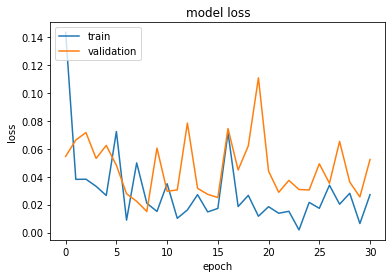

In [9]:
# Training history Statistics

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save

In [10]:
# Save model
model.save('classifier3A.h5') 

import h5py
# save history
h = h5py.File('../history/c_his_3A.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Analysis

In [5]:
# Check model performance accuracy before
# model = load_model('classifier3A.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


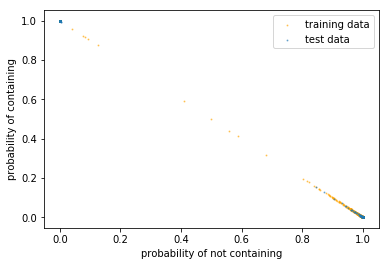

In [6]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()

# LOOK INTO TEST SET

In [8]:
# Due to some bad organization... now have to do this. Need to change in next one
Xtrain,Xtest,ytrain,ytest = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

In [15]:
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.generate_data import convert, visualize

import pylab

  0%|          | 0/1800 [00:00<?, ?it/s]

False negative:  0


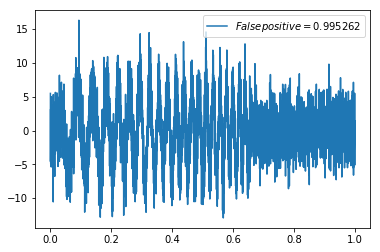

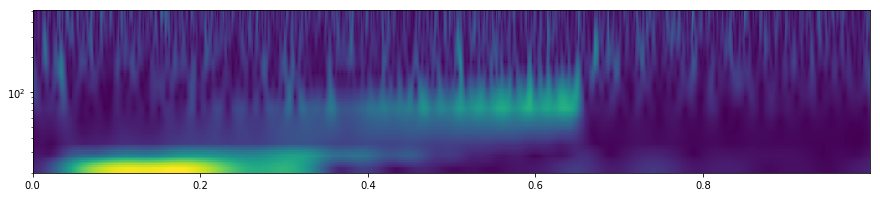

 16%|█▌        | 289/1800 [00:02<00:11, 130.53it/s]

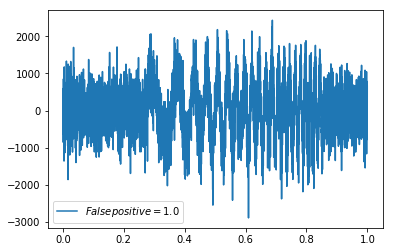

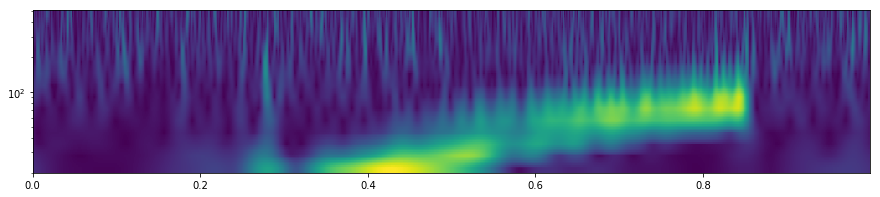

 27%|██▋       | 489/1800 [00:03<00:09, 135.27it/s]

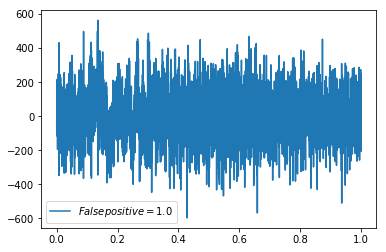

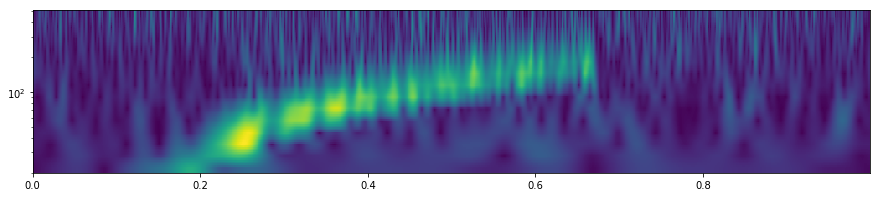

 32%|███▏      | 580/1800 [00:05<00:13, 91.20it/s] 

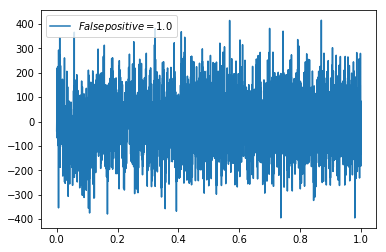

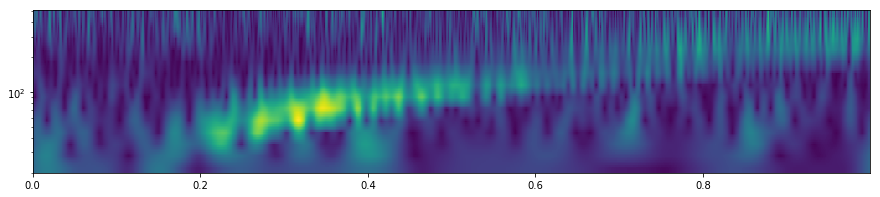

 35%|███▌      | 634/1800 [00:07<00:21, 55.11it/s]

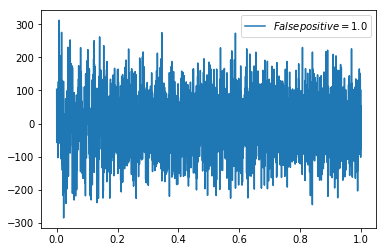

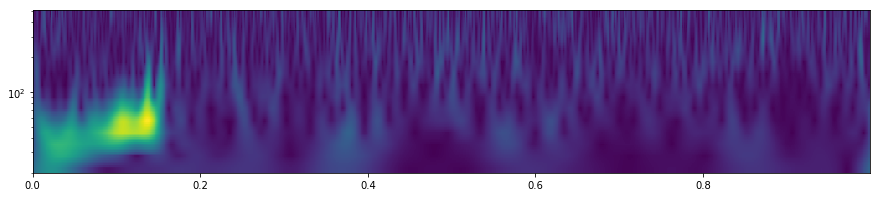

 38%|███▊      | 683/1800 [00:08<00:26, 42.51it/s]

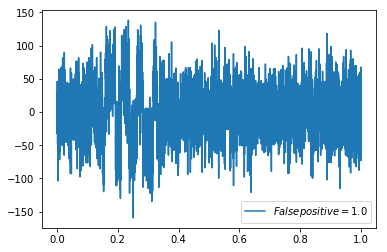

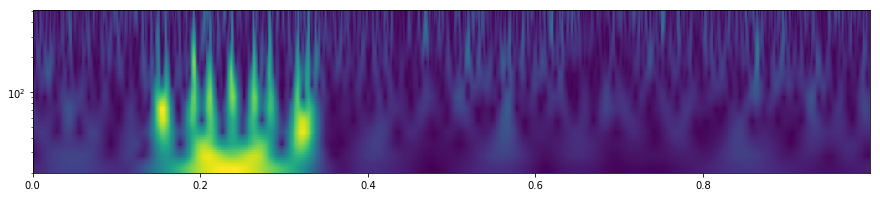

100%|██████████| 1800/1800 [00:10<00:00, 164.75it/s]

False positive:  6


In [16]:
# find wrong predictions in test set

false_negative = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] < 0.5 and ytest[i][0]==1:
        false_negative += 1
        falneg_wf = convert(Xtest[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falneg_wf)
        
print("False negative: ", false_negative)


false_positive = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.5 and ytest[i][0]==0:
        false_positive += 1
        falpos_wf = convert(Xtest[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falpos_wf)
        
print("False positive: ", false_positive)

In [17]:
# find the ones that the model is unsure of

uncertain_count = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.4 and pos1[i] < 0.6:
        uncertain_count += 1
        unsure_wf = convert(Xtest[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos1[i] + ' actually '+ str(ytest[i]))
        pylab.legend()
        pylab.show()
        visualize(unsure_wf)

print("uncertained: ", uncertain_count)

100%|██████████| 1800/1800 [00:00<00:00, 129944.01it/s]

uncertained:  0


# LOOK INTO TRAINING SET

 72%|███████▏  | 11658/16200 [00:00<00:00, 116579.00it/s]

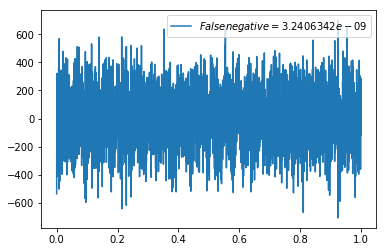

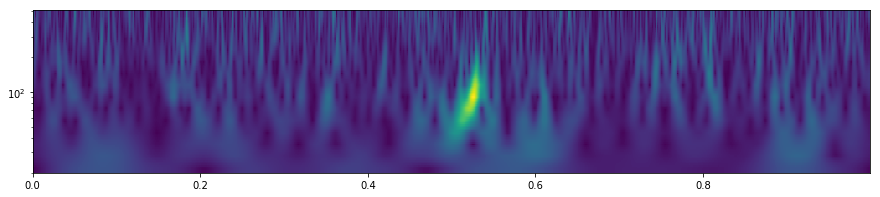

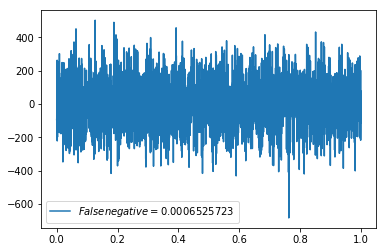

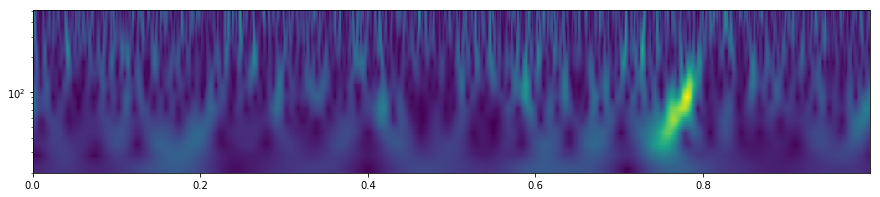

 94%|█████████▎| 15156/16200 [00:04<00:00, 2665.55it/s]  

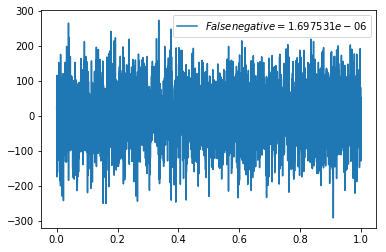

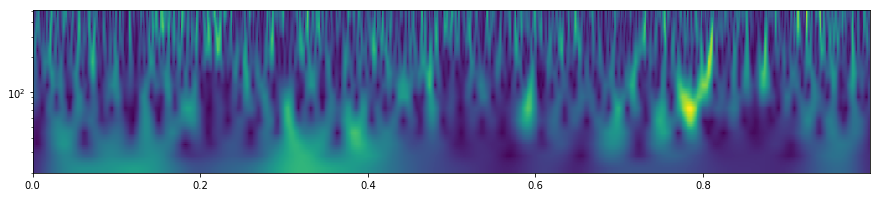

  0%|          | 0/16200 [00:00<?, ?it/s]

False negative:  3


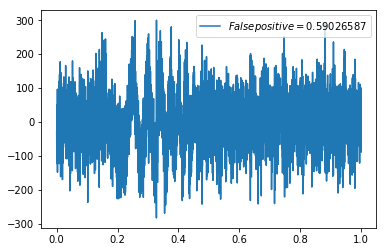

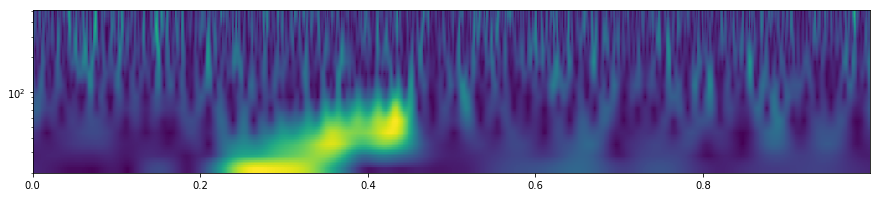

 12%|█▏        | 1964/16200 [00:01<00:11, 1198.61it/s]

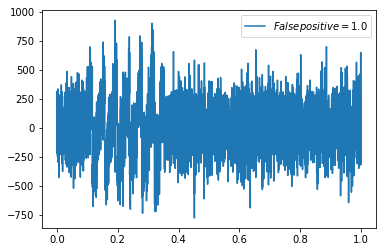

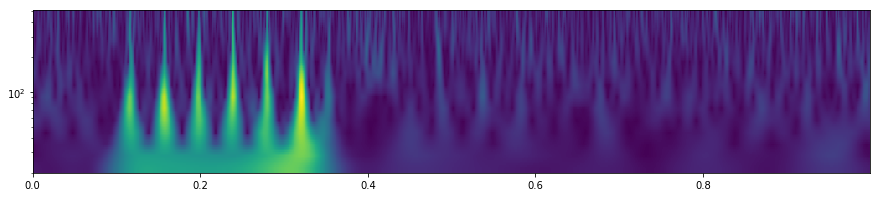

 13%|█▎        | 2181/16200 [00:03<00:34, 404.03it/s] 

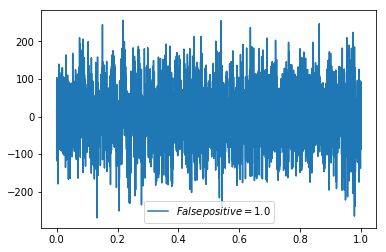

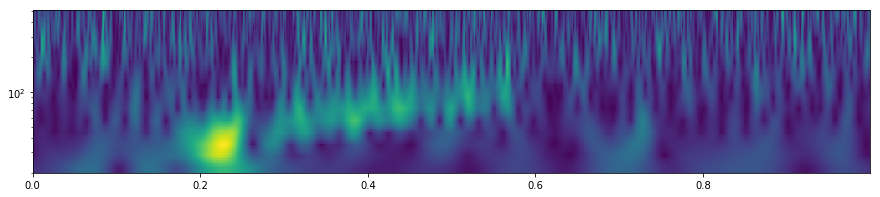

 14%|█▍        | 2274/16200 [00:04<01:32, 151.02it/s]

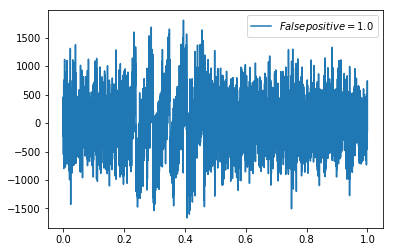

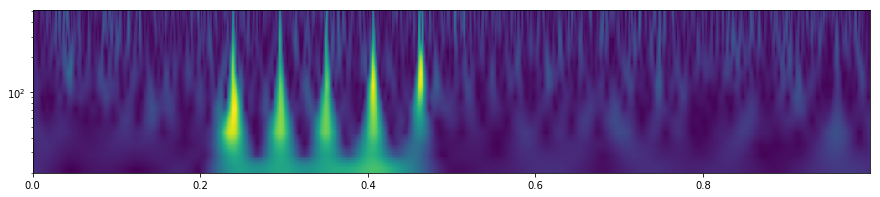

 15%|█▌        | 2457/16200 [00:05<01:33, 146.64it/s]

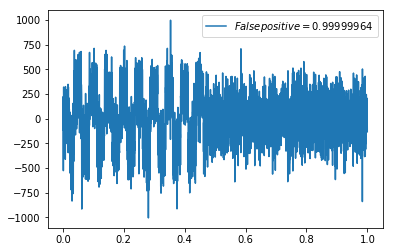

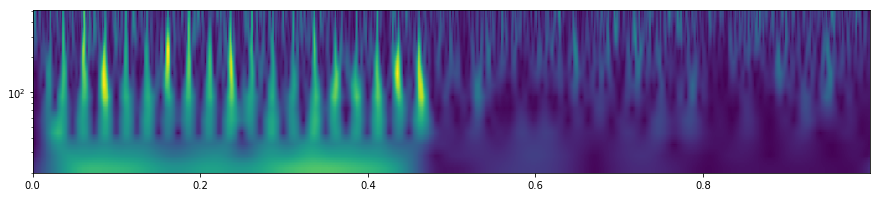

 21%|██        | 3383/16200 [00:07<01:06, 191.69it/s]

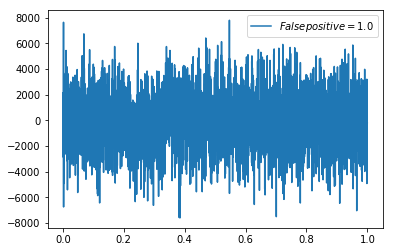

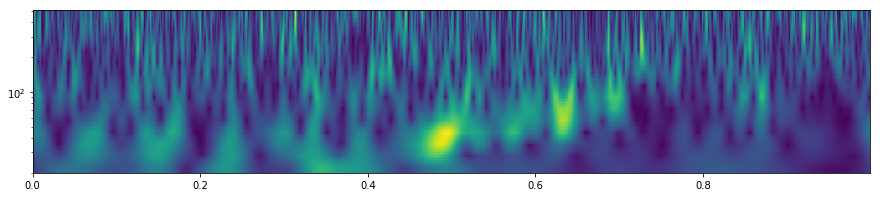

 22%|██▏       | 3549/16200 [00:09<01:27, 145.01it/s]

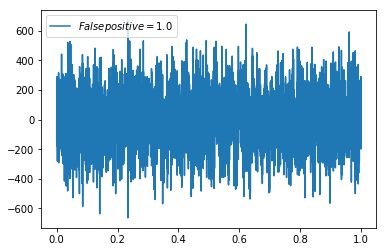

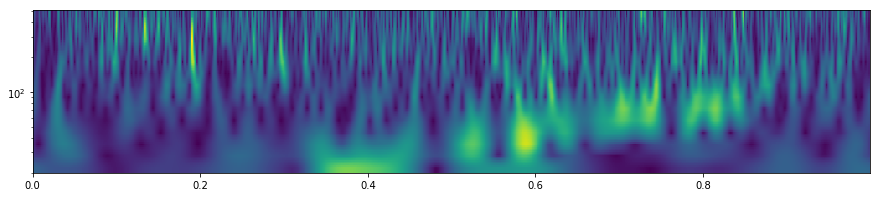

 23%|██▎       | 3805/16200 [00:10<01:26, 143.49it/s]

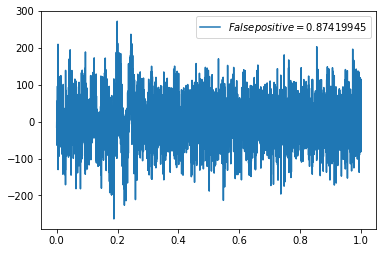

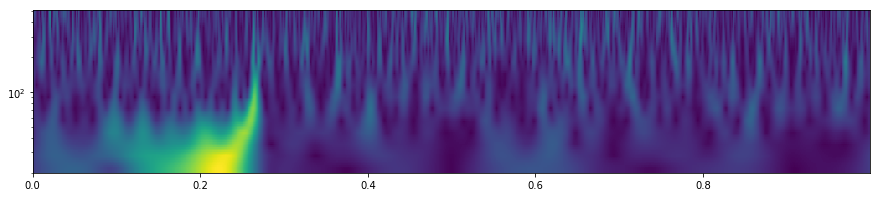

 38%|███▊      | 6167/16200 [00:12<00:51, 194.83it/s]

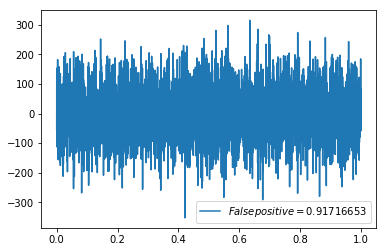

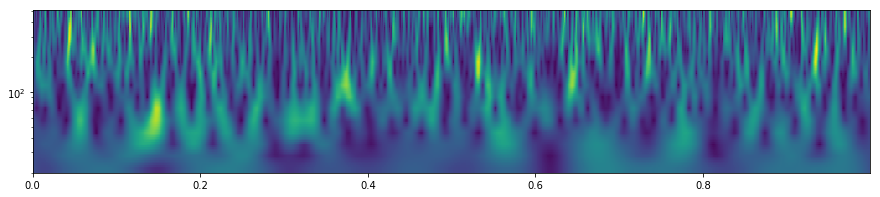

 41%|████      | 6641/16200 [00:14<00:43, 220.53it/s]

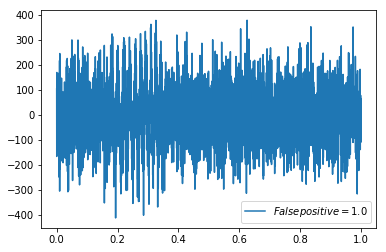

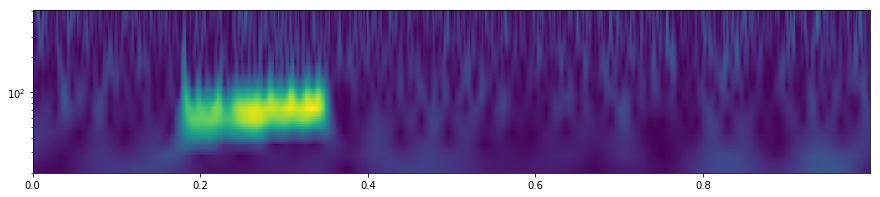

 47%|████▋     | 7634/16200 [00:16<00:32, 266.60it/s]

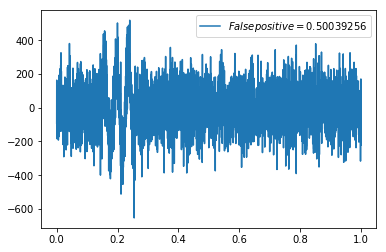

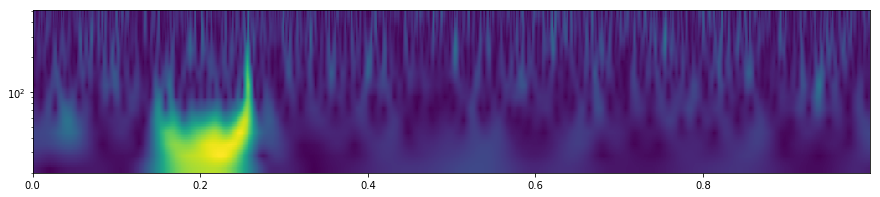

 50%|█████     | 8152/16200 [00:18<00:33, 237.32it/s]

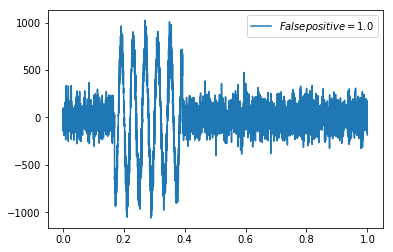

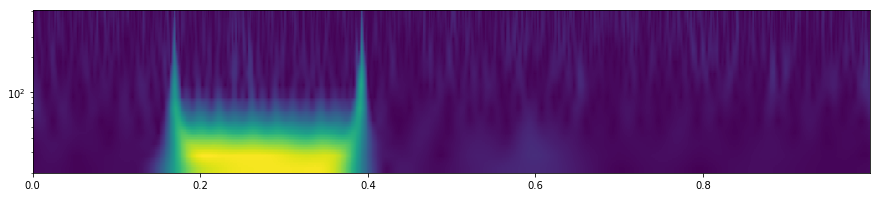

 55%|█████▌    | 8979/16200 [00:20<00:26, 273.38it/s]

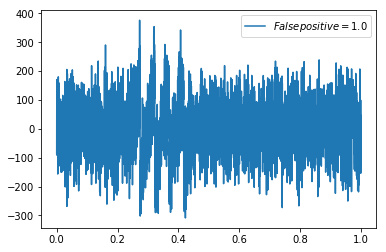

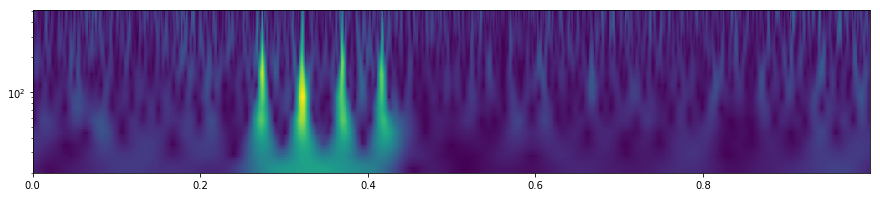

 60%|██████    | 9731/16200 [00:22<00:19, 323.70it/s]

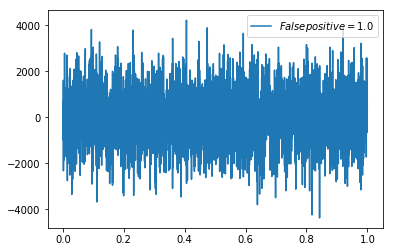

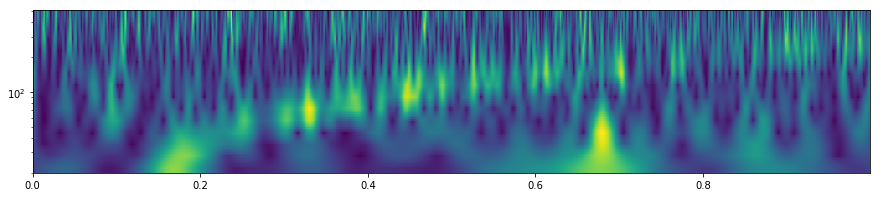

 63%|██████▎   | 10241/16200 [00:23<00:17, 348.26it/s]

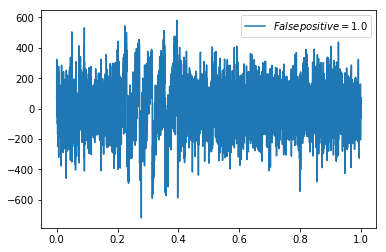

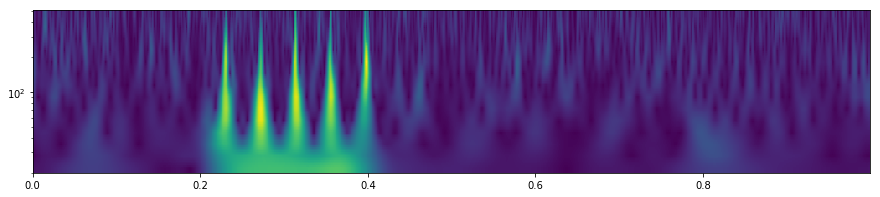

 64%|██████▎   | 10325/16200 [00:24<00:37, 157.60it/s]

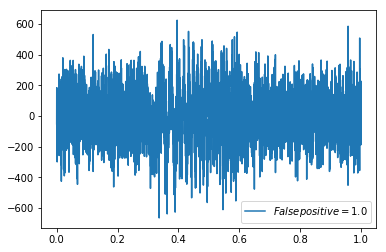

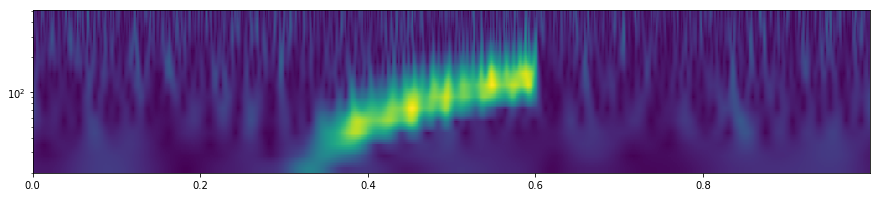

 64%|██████▍   | 10359/16200 [00:26<01:53, 51.37it/s] 

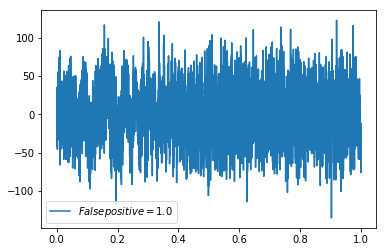

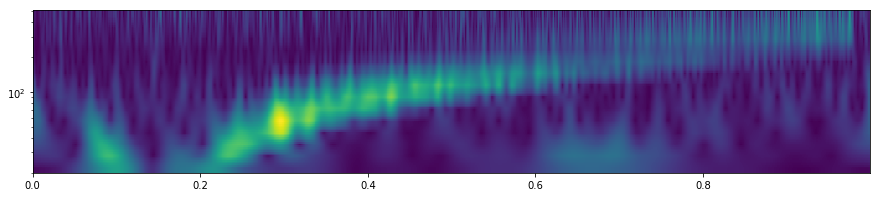

 75%|███████▍  | 12092/16200 [00:28<00:57, 71.38it/s]

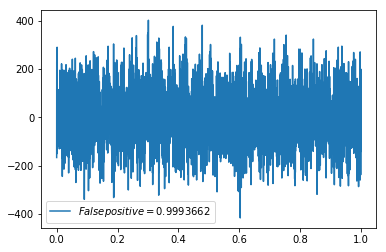

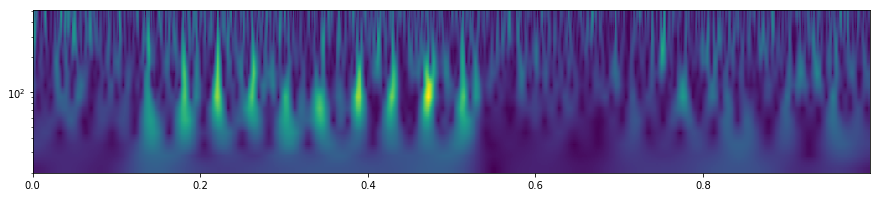

 76%|███████▌  | 12310/16200 [00:30<00:46, 84.21it/s]

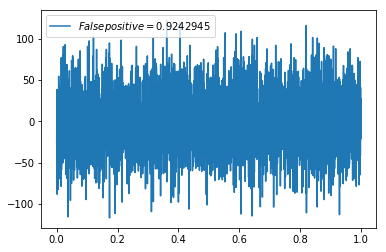

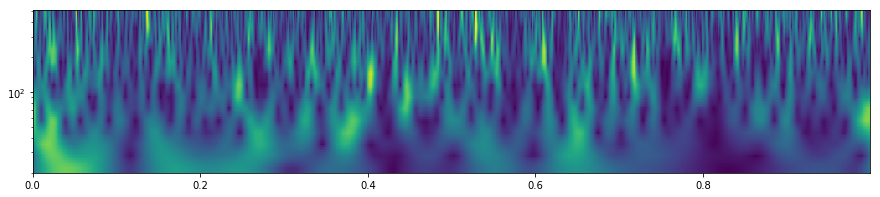

 77%|███████▋  | 12523/16200 [00:32<00:42, 85.89it/s]

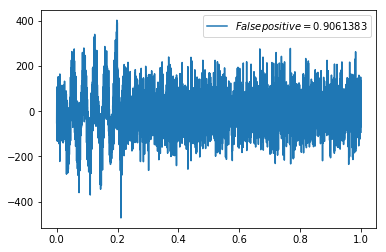

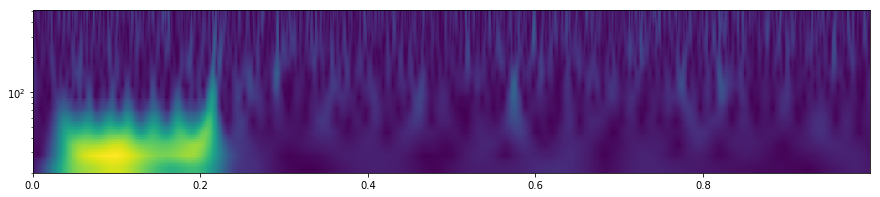

 78%|███████▊  | 12615/16200 [00:34<00:52, 67.70it/s]

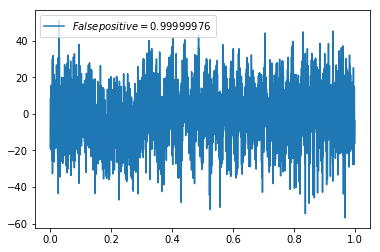

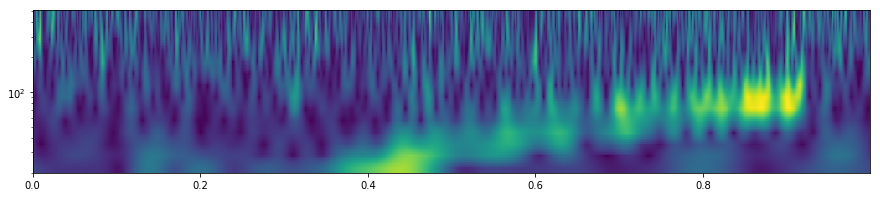

 80%|████████  | 12963/16200 [00:35<00:37, 86.57it/s]

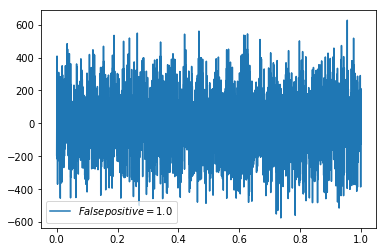

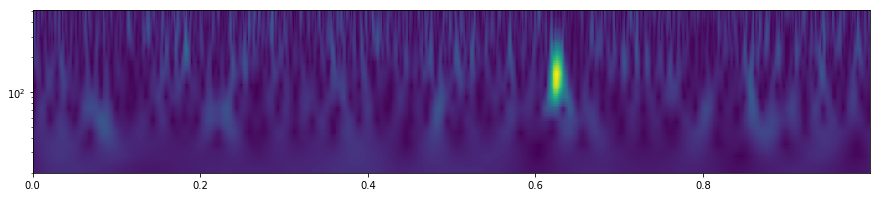

 83%|████████▎ | 13469/16200 [00:37<00:24, 112.11it/s]

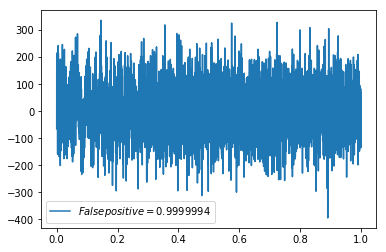

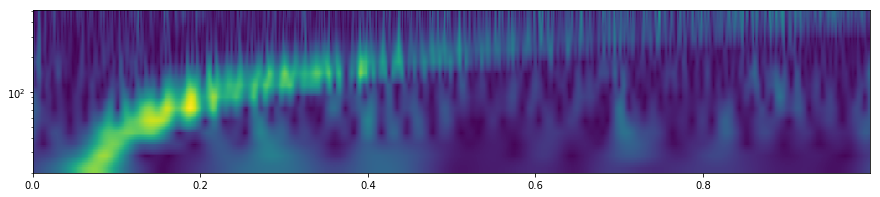

 83%|████████▎ | 13495/16200 [00:38<01:03, 42.60it/s] 

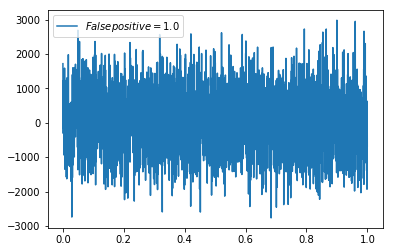

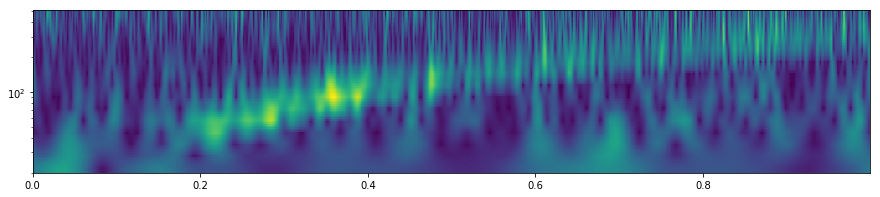

 88%|████████▊ | 14214/16200 [00:40<00:33, 58.75it/s]

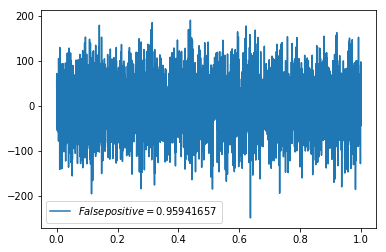

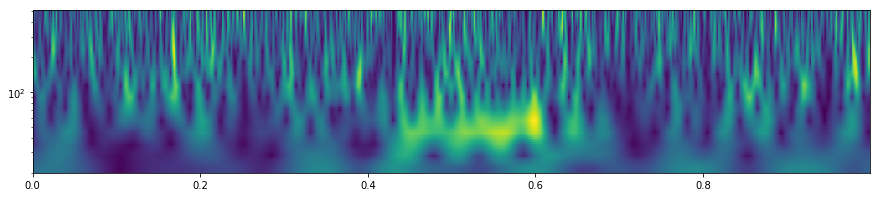

 89%|████████▉ | 14435/16200 [00:41<00:24, 71.46it/s]

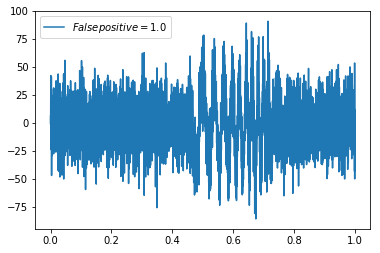

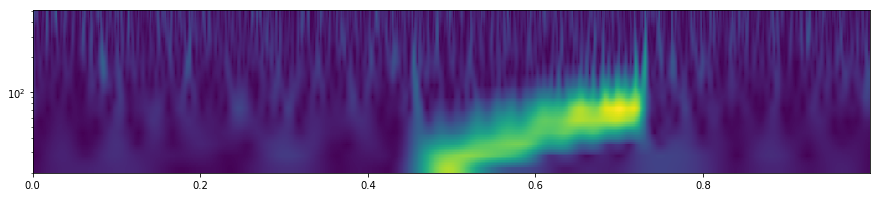

 92%|█████████▏| 14901/16200 [00:43<00:14, 92.61it/s]

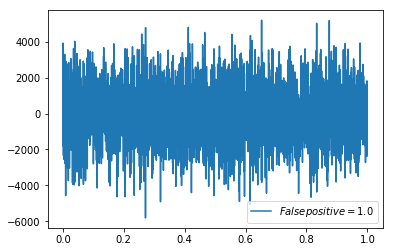

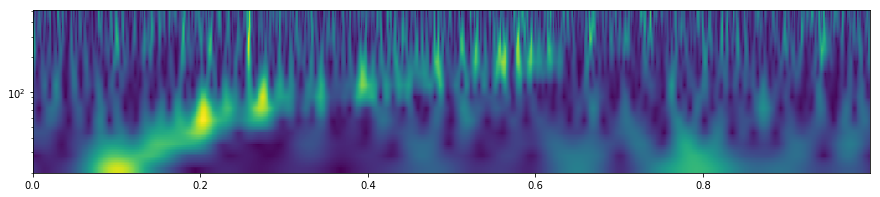

 92%|█████████▏| 14927/16200 [00:45<00:39, 32.59it/s]

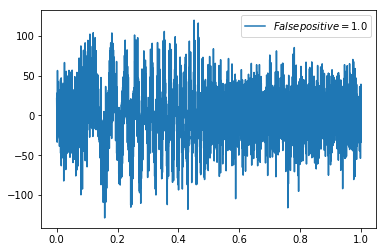

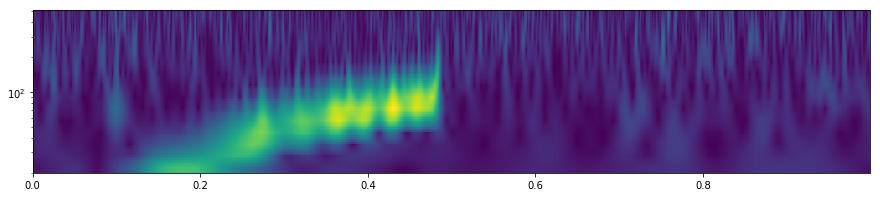

 97%|█████████▋| 15786/16200 [00:46<00:09, 45.58it/s]

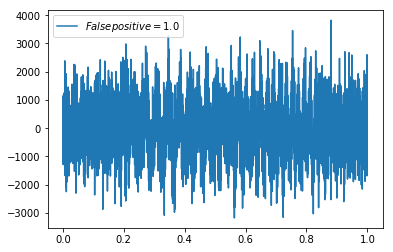

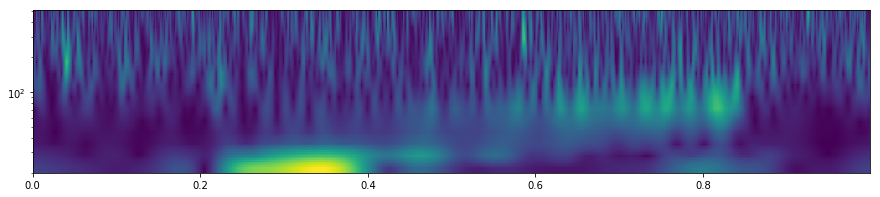

100%|██████████| 16200/16200 [00:48<00:00, 335.07it/s]

False positive:  29


In [18]:
# find wrong predictions in training set

false_negative_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] < 0.5 and ytrain[i][0]==1:
        false_negative_train += 1
        falneg_wf = convert(Xtrain[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos2[i])
        pylab.legend()
        pylab.show()
        visualize(falneg_wf)
        
        
print("False negative: ", false_negative_train)


false_positive_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] > 0.5 and ytrain[i][0]==0:
        false_positive_train += 1
        falpos_wf = convert(Xtrain[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos2[i])
        pylab.legend()
        pylab.show()
        visualize(falpos_wf)
        
print("False positive: ", false_positive_train)

  0%|          | 0/16200 [00:00<?, ?it/s]

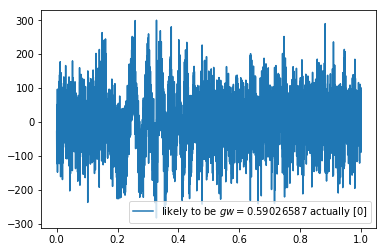

 35%|███▌      | 5729/16200 [00:00<00:03, 3348.36it/s]

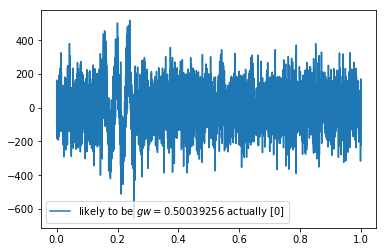

 50%|█████     | 8152/16200 [00:01<00:02, 3116.34it/s]

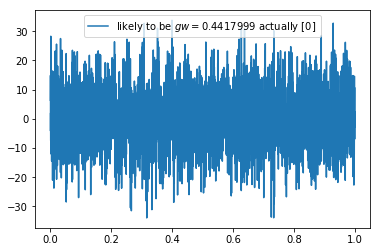

 93%|█████████▎| 15033/16200 [00:03<00:00, 4355.89it/s]

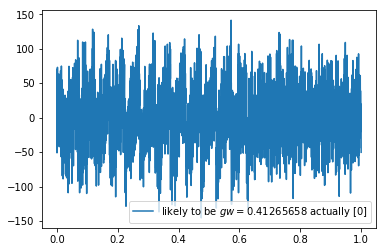

100%|██████████| 16200/16200 [00:03<00:00, 4189.47it/s]

uncertained:  4


In [19]:
# find the ones that the model is unsure of

uncertain_count_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] > 0.4 and pos2[i] < 0.6:
        uncertain_count_train += 1
        unsure_wf = convert(Xtrain[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos2[i] + ' actually '+ str(ytrain[i]))
        pylab.legend()
        pylab.show()

print("uncertained: ", uncertain_count_train)